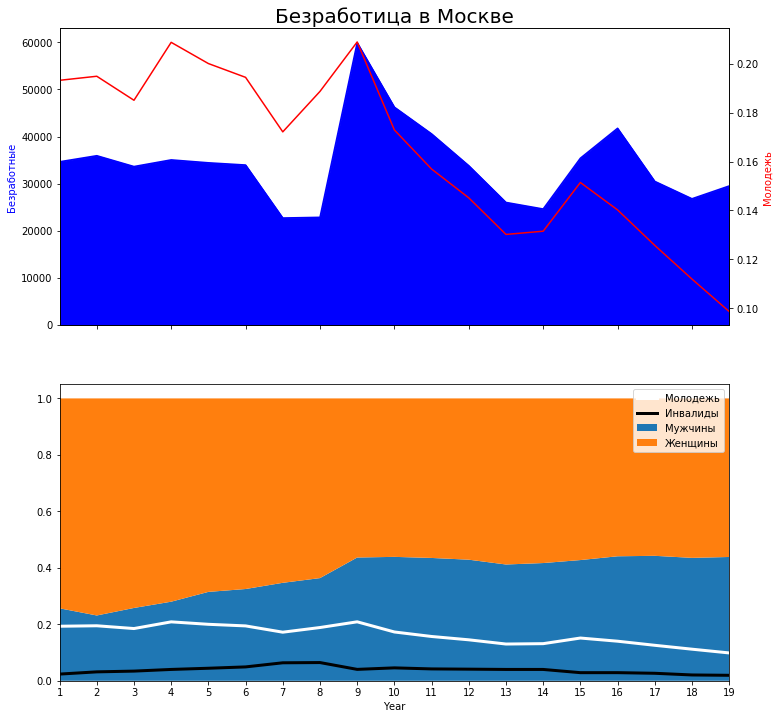

In [12]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv", delimiter=";")
data = data.dropna(axis=1)
data["Year"] = data["Year"]%100
years = data.groupby("Year").mean()
years["UnemployedMen"] = years["UnemployedMen"] / years["UnemployedTotal"]
years["UnemployedWomen"] = years["UnemployedWomen"] / years["UnemployedTotal"]
years["UnemployedYoung"] = years["UnemployedYoung"] / years["UnemployedTotal"]
years["UnemployedDisabled"] = years["UnemployedDisabled"] / years["UnemployedTotal"]

fig = plt.figure(figsize=(12, 12))
area = fig.add_subplot(2, 1, 1)
area.set_title("Безработица в Москве", fontsize=20)
years["UnemployedTotal"].plot.area(ax=area, color="blue")
area.set_ylabel("Безработные", color="blue")
area2 = area.twinx()
years["UnemployedYoung"].plot.line(ax=area2, color="red")
area2.set_ylabel("Молодежь", color="red")

area = fig.add_subplot(2, 1, 2)
years["UnemployedYoung"].plot.line(ax=area, color="white", lw=3)
years["UnemployedDisabled"].plot.line(ax=area, color="black", lw=3)
area.stackplot(years.index, [years["UnemployedMen"], years["UnemployedWomen"]])
area.legend(["Молодежь", "Инвалиды", "Мужчины", "Женщины"])
plt.xticks(years.index)
plt.show()